**Etude de fiabilité d'une machine:**

fiabilité : Probabilité pour qu'une pièce primaire, un dispositif ou un équipement complet soit utilisé sans défaillance pendant une période de temps déterminée, dans des conditions opérationnelles spécifiées.

Pour effectuer cette analyse, nous utiliserons des exemples de données provenant de machines dont le temps de maintenance des pannes correspondant a été enregistré.

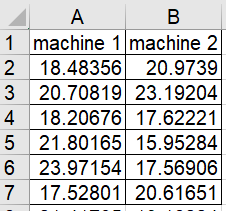

La machine 1 a représenté un temps de panne de 18 semaines, 20 semaines et similaire La machine 2 a représenté un temps de panne de 20 semaines et 23 semaines

**Importing Packages**

In [ ]:
!pip install reliability

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import reliability
from reliability.Fitters import Fit_Everything

**Reading Data**

In [ ]:
failure_times = pd.read_csv('/content/drive/MyDrive/datasets/failure_times.csv')

In [ ]:
failure_times.head()

,machine 1,machine 2
0,18.4836,20.9739
1,20.7082,23.192
2,18.2068,17.6222
3,21.8016,15.9528
4,23.9715,17.5691


**L'analyse exploratoire des données**

In [ ]:
print("la taille de dataFrame : " + str(failure_times.shape))

la taille de dataFrame : (100, 2)


**Vérification des valeurs nulles**

In [ ]:
failure_times.isnull().sum()

machine 1    0
machine 2    0
dtype: int64

**Vérification de la distribution des temps de défaillance des deux machines M1 et M2**

Text(0, 0.5, 'Frequency')

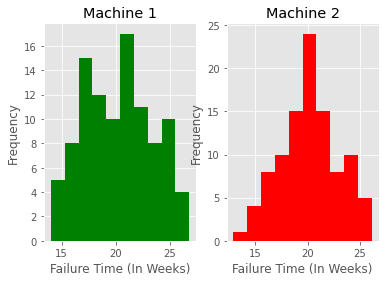

In [ ]:
plt.subplot(1,2,1)
plt.hist(failure_times['machine 1'],color = 'green')
plt.title("Machine 1")
plt.xlabel("Failure Time (In Weeks)")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(failure_times['machine 2'],color = 'red')
plt.title("Machine 2")
plt.xlabel("Failure Time (In Weeks)")
plt.ylabel("Frequency")

In [ ]:
failure_times.describe()

,machine 1,machine 2
count,100,100
mean,20.2738,20.1857
std,3.19566,2.82453
min,14.0204,12.9348
25%,17.7726,18.4794
50%,20.4037,20.2791
75%,22.2534,21.9617
max,26.7586,26.1262


**Machine 1 - Analyse:**

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

   Distribution    Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma   Lambda  Log-likelihood    AICc     BIC       AD   optimizer
       Gamma_2P 0.505881 40.0762                                                                                          -257.451 519.025 524.112 0.714438         TNC
      Normal_2P                                                                          20.2738  3.17964                 -257.571 519.265 524.352  0.73643         TNC
   Lognormal_2P                                                                          2.99682 0.159211                  -257.83 519.784  524.87 0.762017 nelder-mead
     Weibull_3P  8.51086 2.59019 12.7259                                                                                  -255.618 517.487 525.052 0.621124         TNC
     Weibull_2P   21.644 7.09371                       

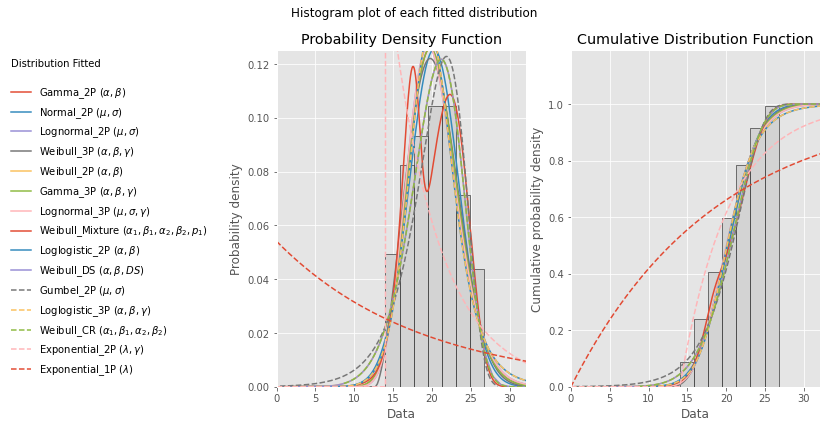

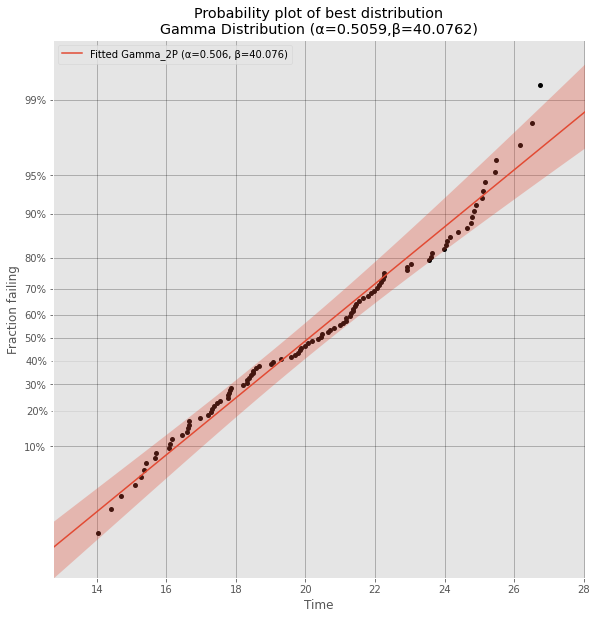

In [ ]:
output = Fit_Everything(failures=failure_times.loc[:,'machine 1'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

**Comme nous pouvons le voir, la distribution gamma à 2 paramètres correspond assez bien à la distribution, avec les paramètres - alpha - 0,5058 et bêta = 40,083**

**Visualisation PDF, CDF, fonction de survie et fonction de risque**

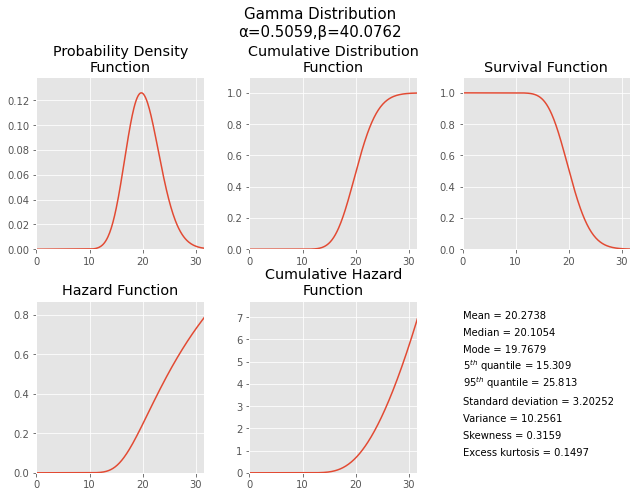

In [ ]:
output.best_distribution.plot()

**La survie de la machine 1 diminue de manière significative après 25 semaines (0,02) et, par conséquent, la probabilité de risque augmente, comme le montre la fonction de risque**

**Obtenir la fiabilité de la machine 1 après le temps t = 25 semaines**

In [ ]:
t= float(input("Type in the desired time before failure: "))

Type in the desired time before failure: 25


In [ ]:
component_1_reliability = output.best_distribution.SF(t) # Survivial Function


In [ ]:
component_1_reliability

0.07689462944515454

**Machine 2 - Analyse:**

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 100/0 (0% right censored) 

   Distribution    Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma    Lambda  Log-likelihood    AICc     BIC       AD optimizer
      Normal_2P                                                                          20.1857  2.81037                  -245.225 494.575 499.661 0.409119       TNC
       Gamma_2P 0.402953 50.0944                                                                                           -246.032 496.187 501.274 0.491457       TNC
     Weibull_2P   21.406 7.95621                                                                                            -246.77 497.664 502.751 0.779714       TNC
   Lognormal_2P                                                                          2.99496 0.143002                    -246.9 497.924 503.011 0.602377       TNC
     Weibull_3P  10.5526  3.8006 10.6509                    

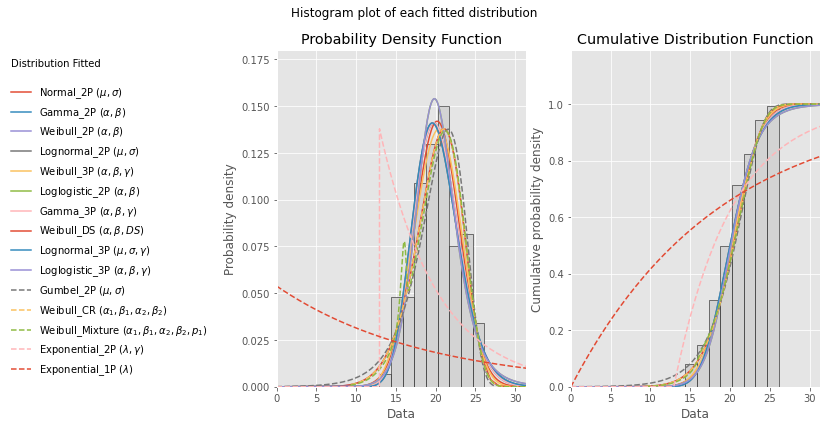

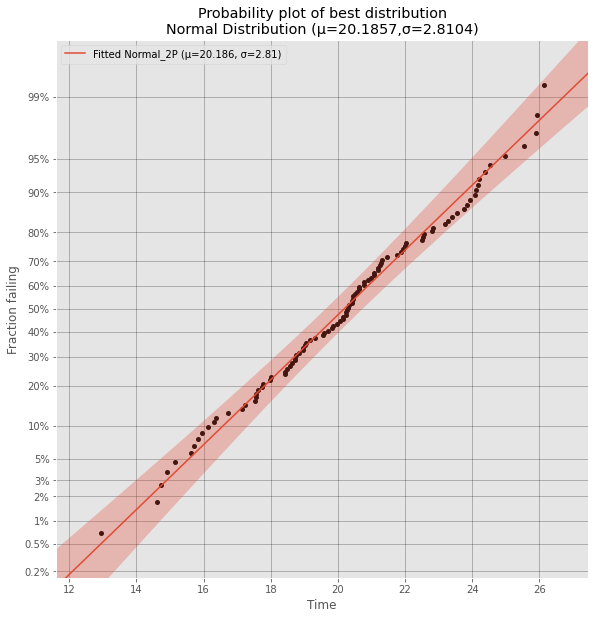

In [ ]:
 output_2 = Fit_Everything(failures=failure_times.loc[:,'machine 2'].dropna().tolist(), show_probability_plot=False, show_PP_plot=False)

**Comme nous pouvons voir que la distribution normale avec une moyenne = 20,18 et un écart type = 2,81 correspond le mieux aux données, nous pouvons utiliser la stratégie d'approximation de la distribution normale**



**Visualisation PDF, CDF, fonction de survie et fonction de risque pour la machine 2**

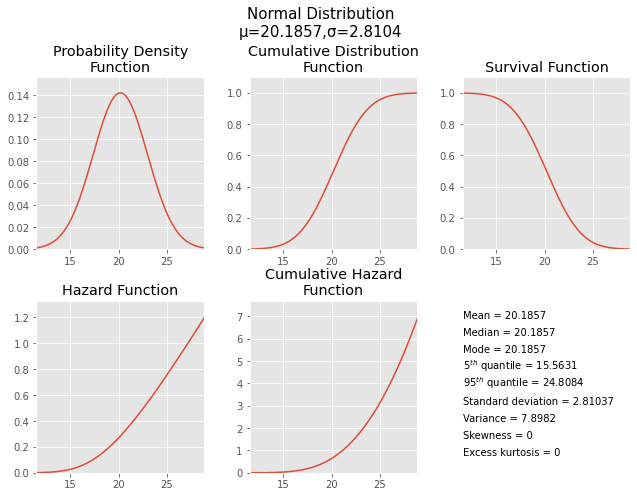

In [ ]:
output_2.best_distribution.plot()

**La survie de la machine 2 diminue de manière significative après 24 semaines (0,02) et, par conséquent, la probabilité de risque augmente, comme le montre la fonction de risque**

**Obtenir la fiabilité de la machine 2 après le temps t = 25 semaines**

In [ ]:
t2= float(input("Type in the desired time before failure: "))

Type in the desired time before failure: 25


In [ ]:
component_2_reliability = output_2.best_distribution.SF(t2) # Survival Function

In [ ]:
component_2_reliability

0.04335218759088583

**Calcul de la fiabilité du système série**

**La fiabilité d'un système série consiste dans le produit des fiabilités de ses composants individuels. Sa formule peut être représentée par :**

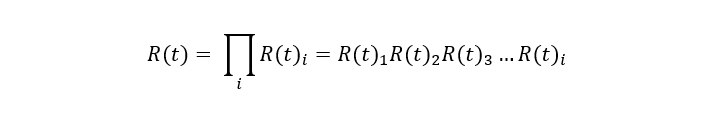

**Dans cette configuration, la fiabilité globale du système peut être considérablement affectée si la fiabilité de l'un de ses composants individuels est médiocre en raison de leur dépendance stricte entre eux.**

**la fiabilité des composants pour t = 0 à t = 32 semaines:**

In [ ]:
time_range = np.arange(1,33)

In [ ]:
sys_reliability_list = []
m1_reliability_list = []
m2_reliability_list = []

for i in time_range:
    m1_reliability = output.best_distribution.SF(float(i))
    m2_reliability = output_2.best_distribution.SF(float(i))
    m1_reliability_list.append(m1_reliability)
    m2_reliability_list.append(m2_reliability)
    sys_reliability = m1_reliability*m2_reliability
    sys_reliability_list.append(sys_reliability)

Text(0, 0.5, 'Reliability (0-1)')

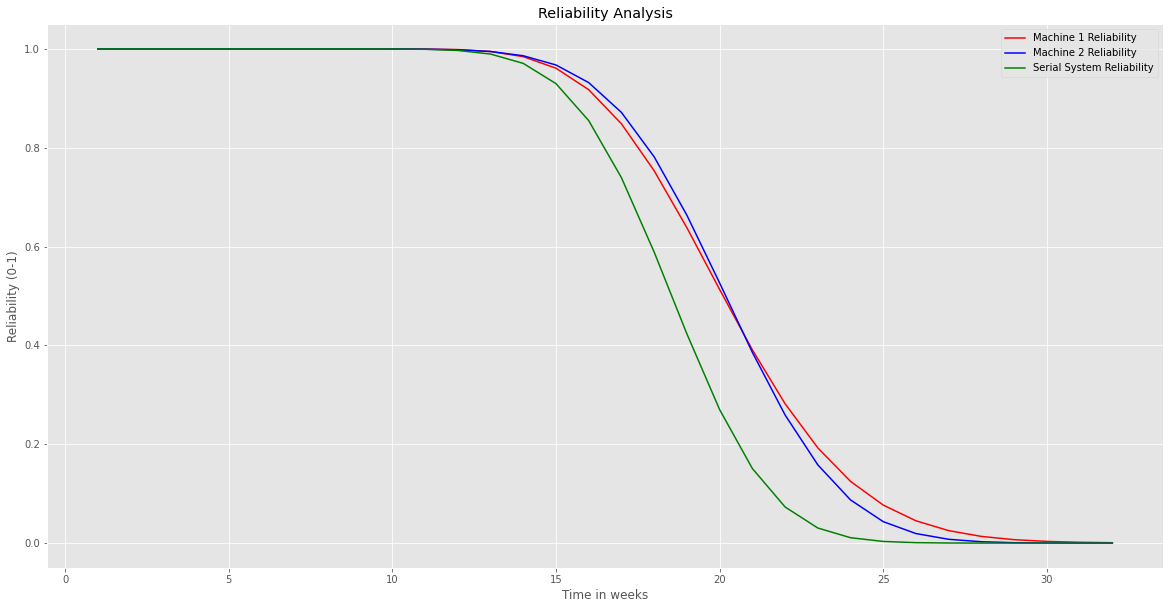

In [ ]:
plt.plot(time_range,m1_reliability_list,color = 'red',label = 'Machine 1 Reliability')
plt.plot(time_range,m2_reliability_list,color = 'blue',label = 'Machine 2 Reliability')
plt.plot(time_range,sys_reliability_list,color = 'green',label = 'Serial System Reliability')
plt.legend()
plt.title("Reliability Analysis")
plt.xlabel("Time in weeks")
plt.ylabel("Reliability (0-1)")

**Conclusion:**

**La fiabilité globale du système diminue de manière significative à environ t = 20 semaines en raison de la diminution de la fiabilité de la machine 2, ce système peut donc tomber en panne après 20 semaines.**